In [33]:
import plotly.express as px 
import pandas as pd
import requests
import spacy
from spacy import displacy

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt


pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Nodes: ['Python', 'Java', 'C++']
Edges: [('Python', 'Java'), ('Java', 'C++')]


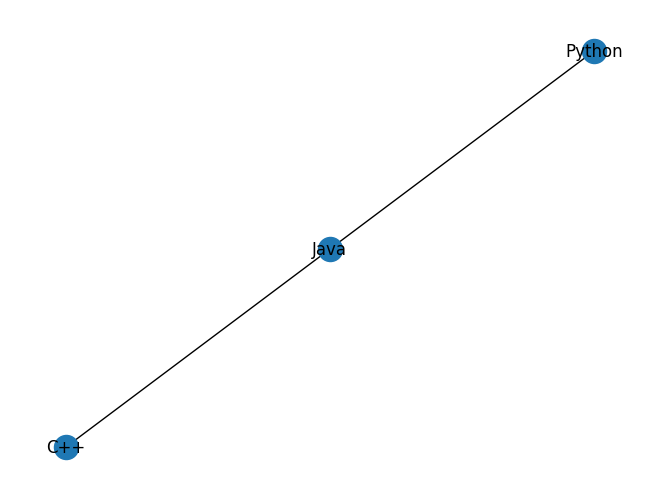

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_node("Python")
G.add_node("Java")
G.add_node("C++")

# Add edges between nodes
G.add_edge("Python", "Java")
G.add_edge("Java", "C++")

# Print the nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())
nx.draw(G, with_labels=True)
plt.show()

In [2]:
sheet1_df = pd.read_csv("Sheet1.csv.csv")
sheet2_df = pd.read_csv("Sheet2.csv.csv")

In [9]:
sheet1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Learning concept                       114 non-null    object
 1   Objective                              88 non-null     object
 2   Bloom's taxonomy                       2 non-null      object
 3   Bloom's Revised Taxonomy-Interpreting  2 non-null      object
 4   Bloom's Revised Taxonomy-Producing     1 non-null      object
dtypes: object(5)
memory usage: 4.6+ KB


In [10]:
sheet2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Assignment  48 non-null     object
 1   Objective   39 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [26]:
G = nx.Graph()

In [27]:
for i, row in sheet1_df.iterrows():
    G.add_node(row["Objective"],label=row["Learning concept"], type="Sheet1")

In [28]:
for j, row in sheet2_df.iterrows():
    G.add_node(row["Objective"],label=row["Assignment"], type="Sheet2")

In [30]:
for i, sheet1_row in sheet1_df.iterrows():
    for j, sheet2_row in sheet2_df.iterrows():
        if sheet1_row["Objective"] == sheet2_row["Objective"]:
            G.add_edge(sheet1_row["Objective"], sheet2_row["Objective"], label=sheet1_row["Learning concept"], weight=1)


In [31]:
print(f"Number of nodes in merged graph: {len(G.nodes)}")
print(f"Number of edges in merged graph: {len(G.edges)}")


Number of nodes in merged graph: 112
Number of edges in merged graph: 10


<Figure size 1200x1200 with 0 Axes>

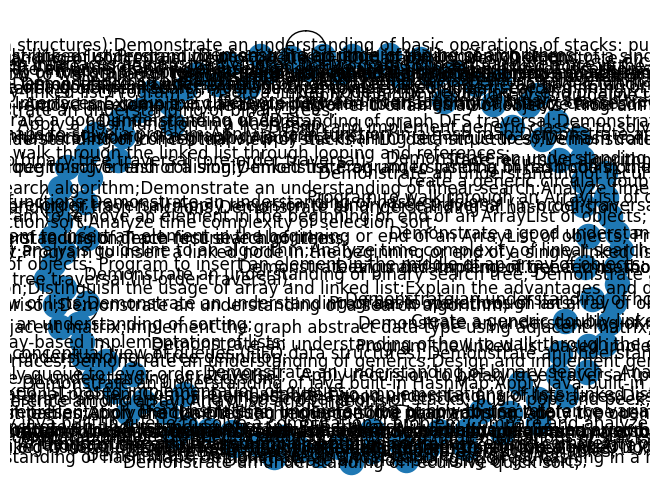

<Figure size 1200x1200 with 0 Axes>

In [32]:
nx.draw(G, with_labels = True)
plt.figure(figsize=(12,12))

In [45]:
import plotly.graph_objects as go

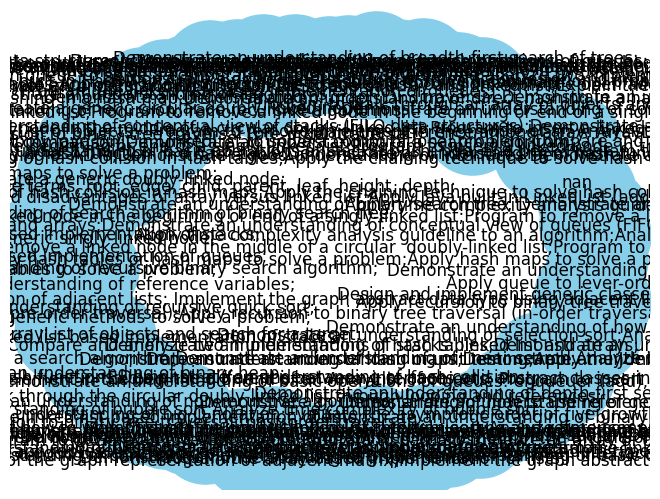

In [48]:
#G1=nx.from_dict_of_lists(G,create_using=nx.MultiDiGraph())
#plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 4500)
plt.show()

In [51]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Read data from CSV file
with open('Reflection_Grade_Clean_Data_2022S.xlsx - finalGrade.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        source = row[0]
        target = row[1]
        weight = float(row[8])
        G.add_edge(source, target, weight=weight)

# Draw the graph using Matplotlib
pos = nx.spring_layout(G)  # Positions nodes using the Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, width=2, edge_color='grey', edge_cmap=plt.cm.Blues)
nx.draw_networkx_edge_labels(G, pos, font_size=8, edge_labels={(u, v): "{:.2f}".format(d['weight']) for u, v, d in G.edges(data=True)})
plt.show()


ValueError: could not convert string to float: 'Quiz chapter9'